1. Import des bibliothèques

In [2]:
import pandas as pd

2. Import des datas

In [19]:
df = pd.read_csv("data.csv")
df
data = pd.read_csv("data.csv")

In [4]:
print(df.info(),df.describe(),df.head(),df.tail(),df.shape,df.duplicated(),df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8402 entries, 0 to 8401
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STRUCTURE              8402 non-null   object 
 1   STRUCTURE_ID           8402 non-null   object 
 2   STRUCTURE_NAME         8402 non-null   object 
 3   ACTION                 8402 non-null   object 
 4   COU                    8402 non-null   object 
 5   Pays                   8402 non-null   object 
 6   SER                    8402 non-null   object 
 7   Série                  8402 non-null   object 
 8   TIME_PERIOD            8402 non-null   int64  
 9   Année                  0 non-null      float64
 10  OBS_VALUE              8402 non-null   float64
 11  Observation Value      0 non-null      float64
 12  OBS_STATUS             8402 non-null   object 
 13  Observation Status     0 non-null      float64
 14  UNIT_MEASURE           0 non-null      float64
 15  Unit

In [5]:
for i in range(len(df.columns)):
  print(df.columns[i])
  print(df.iloc[:,i].unique(),end = '\n\n\n')


  #sert a rien : STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,Année,Observation Value,OBS_STATUS,Observation Status,UNIT_MEASURE,
  # Unit of Measures,UNIT_MULT,Multiplier,BASE_PER,Base reference period

  # question pour les colonnes SER et Série : SER = diminutif de Série ???

STRUCTURE
['DATAFLOW']


STRUCTURE_ID
['OECD:DF_TEL(1.0)']


STRUCTURE_NAME
['Statistiques sur les télécommunications']


ACTION
['I']


COU
['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL'
 'IRL' 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK'
 'ESP' 'SWE' 'CHE' 'TUR' 'GBR' 'USA' 'CHL' 'COL' 'EST' 'ISR' 'LVA' 'LTU'
 'SVN' 'OECD']


Pays
['Australie' 'Autriche' 'Belgique' 'Canada' 'Tchéquie' 'Danemark'
 'Finlande' 'France' 'Allemagne' 'Grèce' 'Hongrie' 'Islande' 'Irlande'
 'Italie' 'Japon' 'Corée' 'Luxembourg' 'Mexique' 'Pays-Bas'
 'Nouvelle-Zélande' 'Norvège' 'Pologne' 'Portugal' 'République slovaque'
 'Espagne' 'Suède' 'Suisse' 'Türkiye' 'Royaume-Uni' 'États-Unis' 'Chili'
 'Colombie' 'Estonie' 'Israël' 'Lettonie' 'Lituanie' 'Slovénie'
 'OCDE - Total']


SER
['TEL-ACC-LINE' 'TEL-ACC-PATH' 'TEL-MOB-SUB' 'TEL-MOB-PP' 'TEL-REV-TOT'
 'TEL-REV-USD' 'TEL-INV-TOT' 'TEL-INV-USD' 'TEL-VOIP-SUB' 'TEL-CATV-SUB'
 'TEL-ACC-PATH100' 'TEL-MOB-SUB100']


Séri

In [ ]:
#suppression des colonnes inutiles :

df = df.drop(columns=["STRUCTURE","STRUCTURE_ID","STRUCTURE_NAME","ACTION","Année","Observation Value","OBS_STATUS",
                 "Observation Status","UNIT_MEASURE","Unit of Measures","UNIT_MULT","Multiplier","BASE_PER",
                 "Base reference period","Pays","Série"])


In [22]:
df
#enlever cou et série
#pivot

,COU,SER,TIME_PERIOD,OBS_VALUE
0,AUS,TEL-ACC-LINE,2015,8.490000e+06
1,AUS,TEL-ACC-PATH,2015,4.141300e+07
2,AUS,TEL-MOB-SUB,2015,2.616000e+07
3,AUS,TEL-MOB-PP,2015,9.255000e+06
4,AUS,TEL-REV-TOT,2015,4.191950e+10
...,...,...,...,...
8397,EST,TEL-ACC-PATH100,1996,3.524000e+01
8398,EST,TEL-MOB-SUB100,1996,4.240000e+00
8399,ISR,TEL-ACC-PATH100,1996,3.490000e+01
8400,OECD,TEL-ACC-PATH100,1996,4.915000e+01


/Users/lilia/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


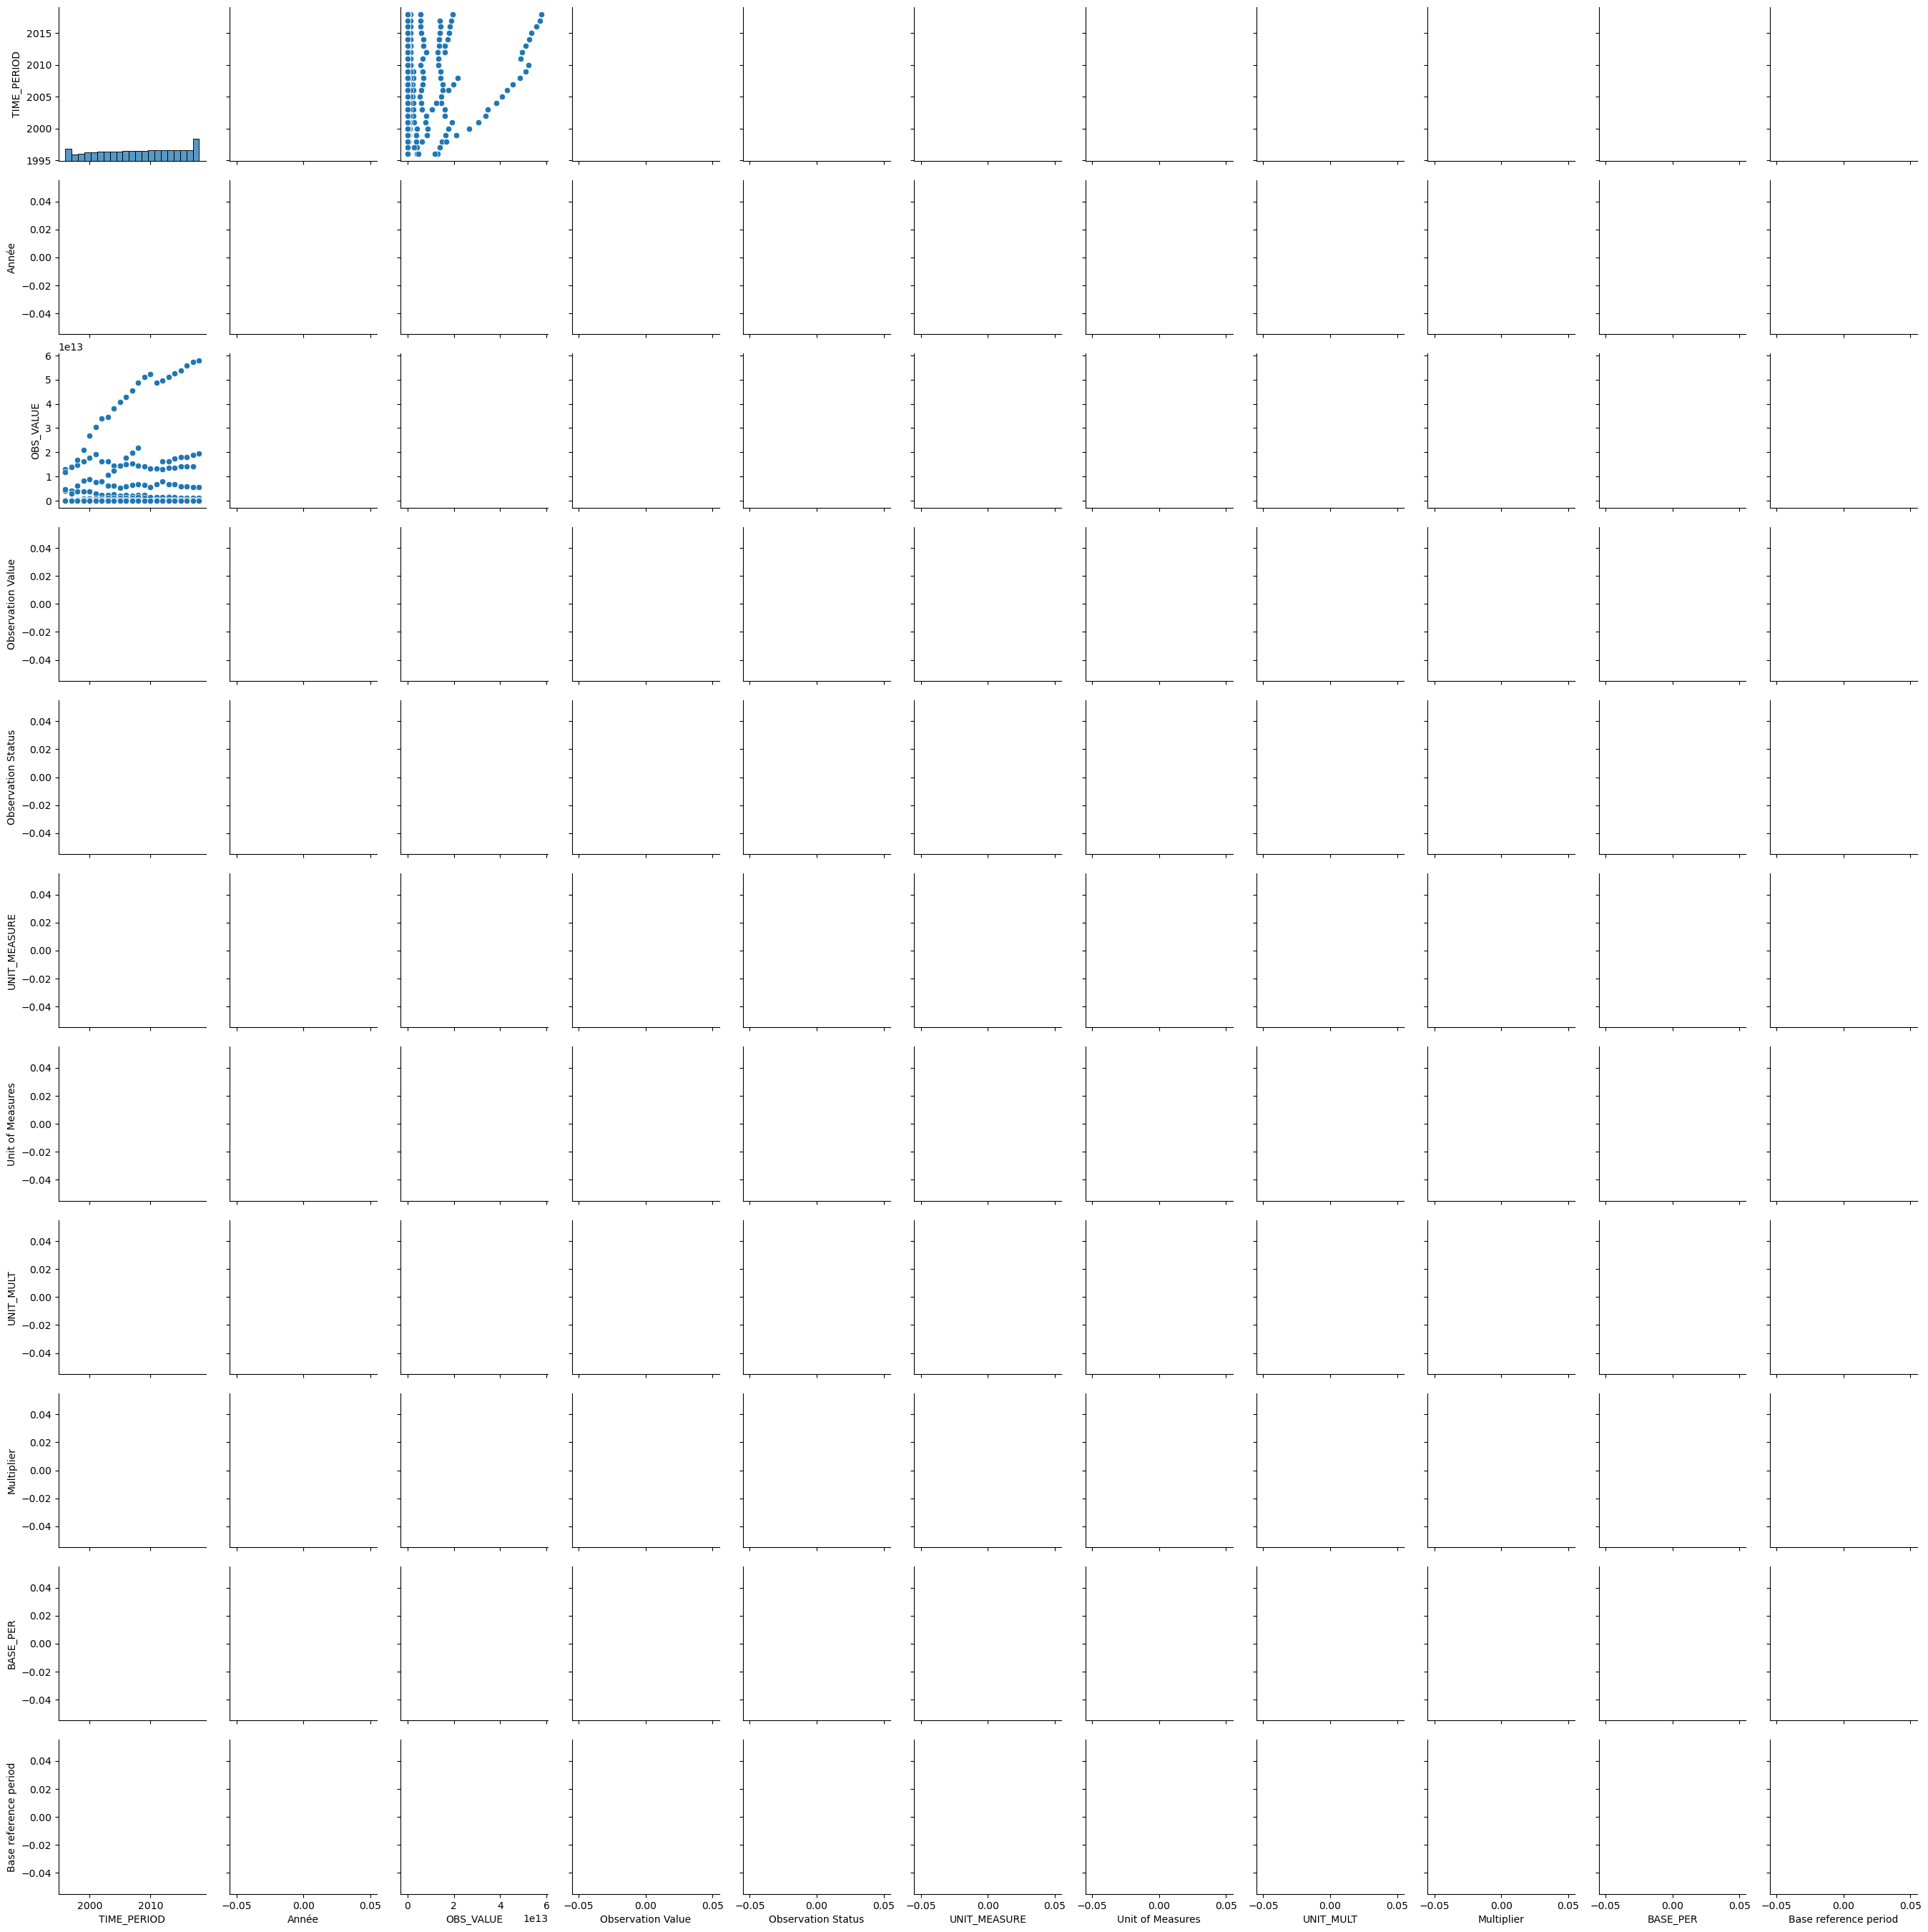

In [9]:
#analyse 2:
import seaborn as sns

sns.pairplot(df)